In [2]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
# Load the dataset from CSV
df = pd.read_csv("C:/Users/Trishit/Documents/Prodigy Infotech/Task 2/Mall_Customers.csv")  # Replace 'your_dataset.csv' with the actual file name

In [5]:
# Check for null values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Extract relevant features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

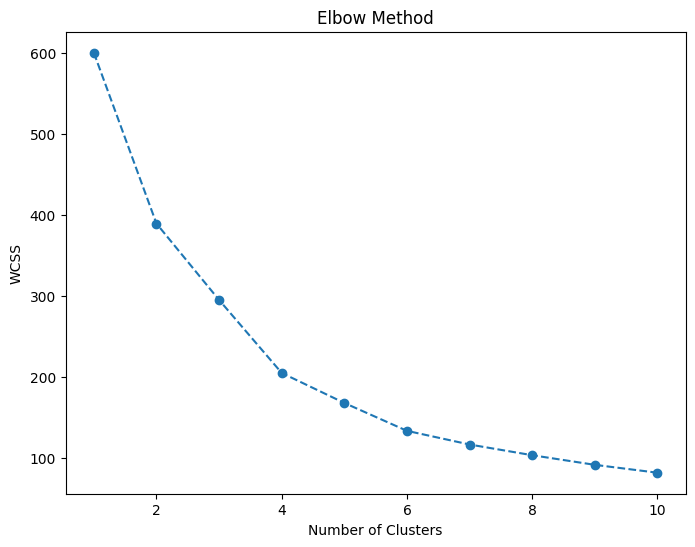

In [9]:
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

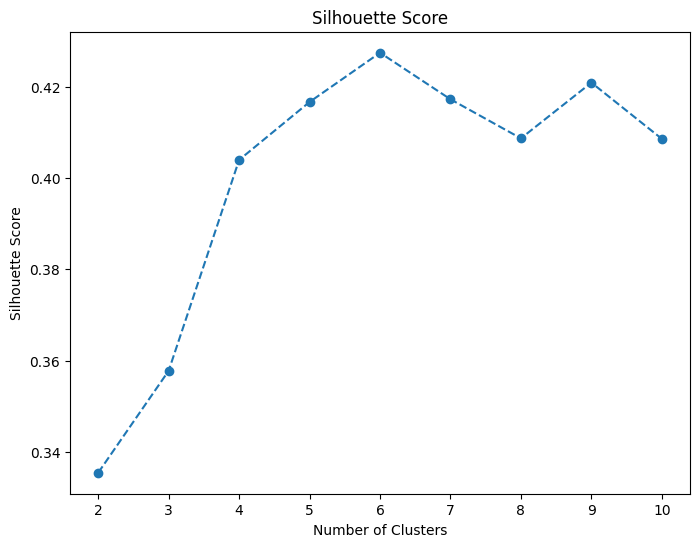

In [10]:
# Silhouette Score to evaluate the goodness of fit
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Silhouette Score graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [11]:
# Choose the optimal number of clusters based on the Elbow Method
optimal_clusters = 3  # Adjust this based on the Elbow graph
print(f'Optimal number of clusters: {optimal_clusters}')

Optimal number of clusters: 3


In [12]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

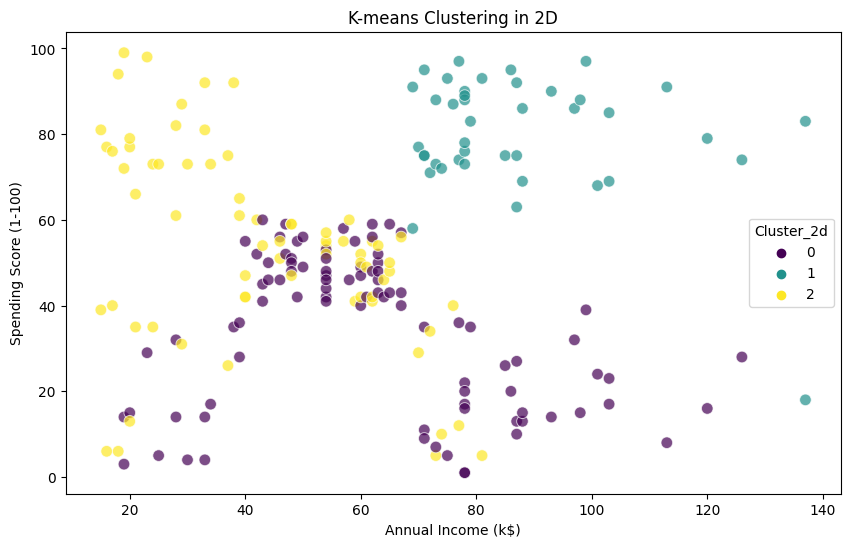

In [13]:
# Choose two features for 2D plot
feature1 = 'Annual Income (k$)'
feature2 = 'Spending Score (1-100)'

# Apply K-means clustering with the optimal number of clusters
kmeans_2d = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster_2d'] = kmeans_2d.fit_predict(X_scaled)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='Cluster_2d', data=df, palette='viridis', s=70, alpha=0.7)
plt.title('K-means Clustering in 2D')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()